## Notebook Imports and Packages

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Example 1

## $f(x) = x^2 + x + 1$

In [150]:
def f(x):
    return x**2 + x + 1

In [151]:
#Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

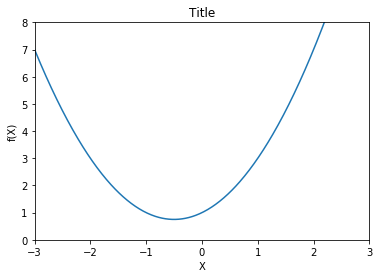

In [152]:
#plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Title')
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives

In [153]:
def df(x):
    return 2*x + 1

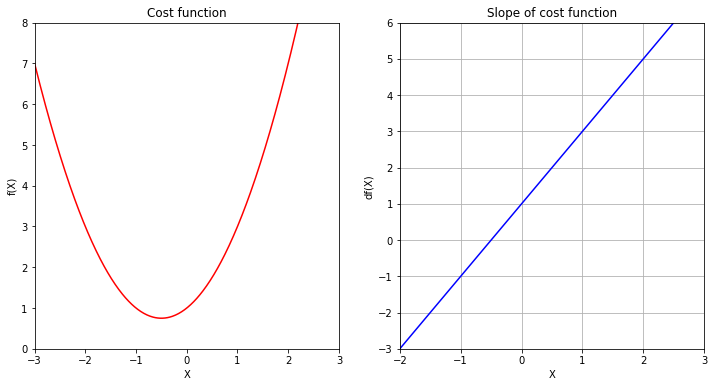

In [154]:
#plot function and derivative side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Cost function')
plt.plot(x_1, f(x_1), 'r')

plt.subplot(1,2,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X')
plt.ylabel('df(X)')
plt.title('Slope of cost function')
plt.plot(x_1, df(x_1), 'b')
plt.grid()

plt.show()

In [155]:
#Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(400):
    previous_x = new_x 
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
   # print(step_size)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if(step_size < precision):
        print('loop runs for:',n)
        break;
    
print('Local Min :', new_x)
print('Slope :', df(new_x))
print('f(x) value is :', f(new_x))

loop runs for: 50
Local Min : -0.49996003706460423
Slope : 7.992587079153068e-05
f(x) value is : 0.7500000015970362


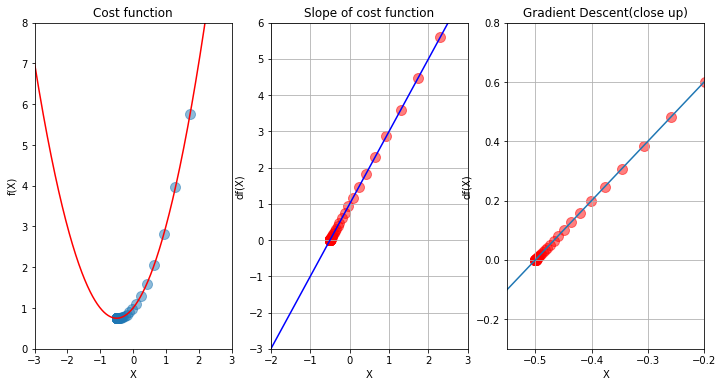

In [156]:
#Superimpose the gradient descent calculations on plot
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Cost function')
plt.plot(x_1, f(x_1), 'r')

values = np.array(x_list)
plt.scatter(x_list, f(values), s=100, alpha=0.5)

plt.subplot(1,3,2)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.xlabel('X')
plt.ylabel('df(X)')
plt.title('Slope of cost function')
plt.grid()
plt.plot(x_1, df(x_1), 'b')

plt.scatter(x_list, slope_list, c='red', s=100, alpha=0.5)



plt.subplot(1,3,3)
plt.xlim(-0.55,-0.2)
plt.ylim(-0.3,0.8)
plt.xlabel('X')
plt.ylabel('df(X)')
plt.title('Gradient Descent(close up)')
plt.grid()
plt.plot(x_1, df(x_1))

plt.scatter(x_list, slope_list, c='red', s=100, alpha=0.5)

plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advance Functions

$$g(x) = x^4 - 4x^2 + 5$$

In [157]:
x_2 = np.linspace(-2,2,1000)

In [158]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 -8*x
    

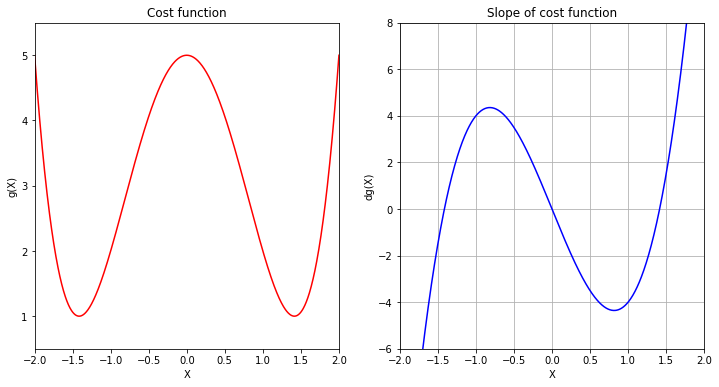

In [159]:
#plot function and derivative side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), 'r')

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(X)')
plt.title('Slope of cost function')
plt.plot(x_2, dg(x_2), 'b')
plt.grid()

plt.show()

## Gradient Descent as a Python Function

In [160]:
def gradient_descent(derivative_func, init_guess, learning_rate, precision,
                    max_iter=300):
    
    new_x = init_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x 
        gradient = derivative_func(previous_x)
        new_x = previous_x - learning_rate * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if(step_size < precision):
            break;
    return new_x, x_list, slope_list


In [161]:
local_min, list_x, deriv_list = gradient_descent(dg,init_guess= 0.5,learning_rate= 0.02,precision= 0.001)
print('Local min:', local_min)
print('No. of steps:', len(list_x))

Local min: 1.4122375085019094
No. of steps: 23


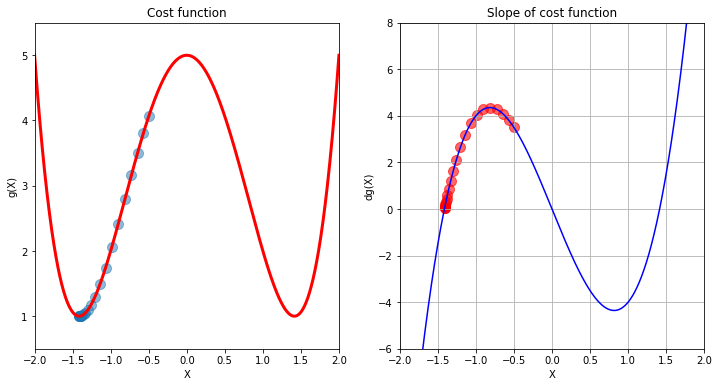

In [162]:
#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(dg,init_guess= -0.5,learning_rate= 0.02,precision= 0.001)

#plot function and derivative and scatter plot side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), 'r',linewidth=3)
plt.scatter(list_x, g(np.array(list_x)),s=100,alpha=0.5)

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(X)')
plt.title('Slope of cost function')
plt.plot(x_2, dg(x_2), 'b')
plt.scatter(list_x, deriv_list, color='r', s=100,alpha=0.6)
plt.grid()

plt.show()

# Example 3 - Divergence, Overflow 
## $$h(x) = x^5 - 2x^4 + 2$$

In [163]:
#Make Data
x_3 = np.linspace(start=-2.5,stop=2.5,num=1000)
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

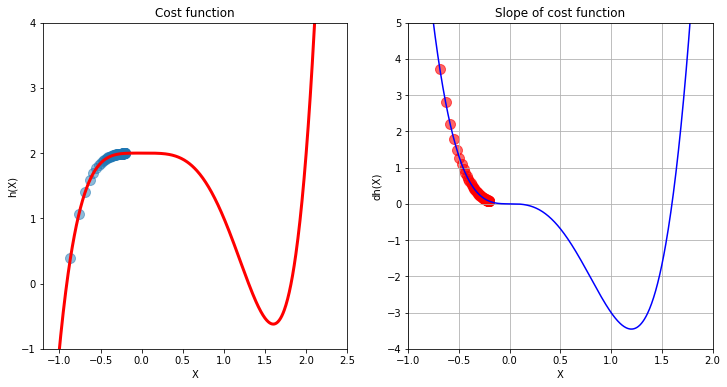

local min: -2071072.4470816324
Cost at min: -3.810455326061589e+31
No. of steps 71


In [164]:
#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(dh,init_guess= -0.2,learning_rate= 0.02,precision= 0.001,max_iter=70)

#plot function and derivative and scatter plot side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X')
plt.ylabel('h(X)')
plt.title('Cost function')
plt.plot(x_3, h(x_3), 'r',linewidth=3)
plt.scatter(list_x, h(np.array(list_x)),s=100,alpha=0.5)

plt.subplot(1,2,2)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.xlabel('X')
plt.ylabel('dh(X)')
plt.title('Slope of cost function')
plt.plot(x_3, dh(x_3), 'b')
plt.scatter(list_x, deriv_list, color='r', s=100,alpha=0.6)
plt.grid()

plt.show()

print('local min:', local_min)
print('Cost at min:',h(local_min))
print('No. of steps',len(list_x))

In [165]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## The Learning Rate

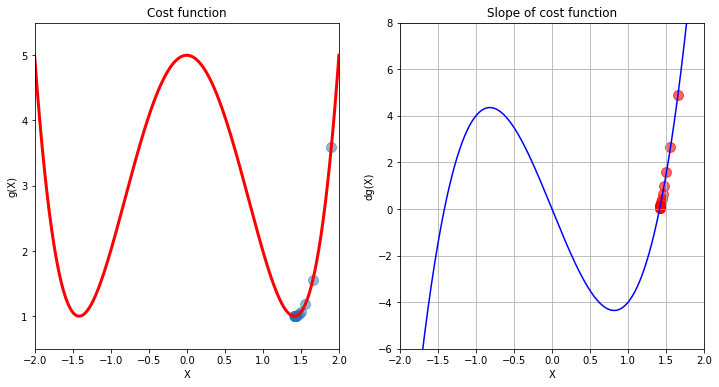

No. of steps 14


In [166]:
#calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(dg,init_guess= 1.9,learning_rate= 0.02,precision= 0.001,max_iter=500)

#plot function and derivative and scatter plot side by side
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.xlabel('X')
plt.ylabel('g(X)')
plt.title('Cost function')
plt.plot(x_2, g(x_2), 'r',linewidth=3)
plt.scatter(list_x, g(np.array(list_x)),s=100,alpha=0.5)

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.xlabel('X')
plt.ylabel('dg(X)')
plt.title('Slope of cost function')
plt.plot(x_2, dg(x_2), 'b')
plt.scatter(list_x, deriv_list, color='r', s=100,alpha=0.6)
plt.grid() 

plt.show()

print('No. of steps',len(list_x))

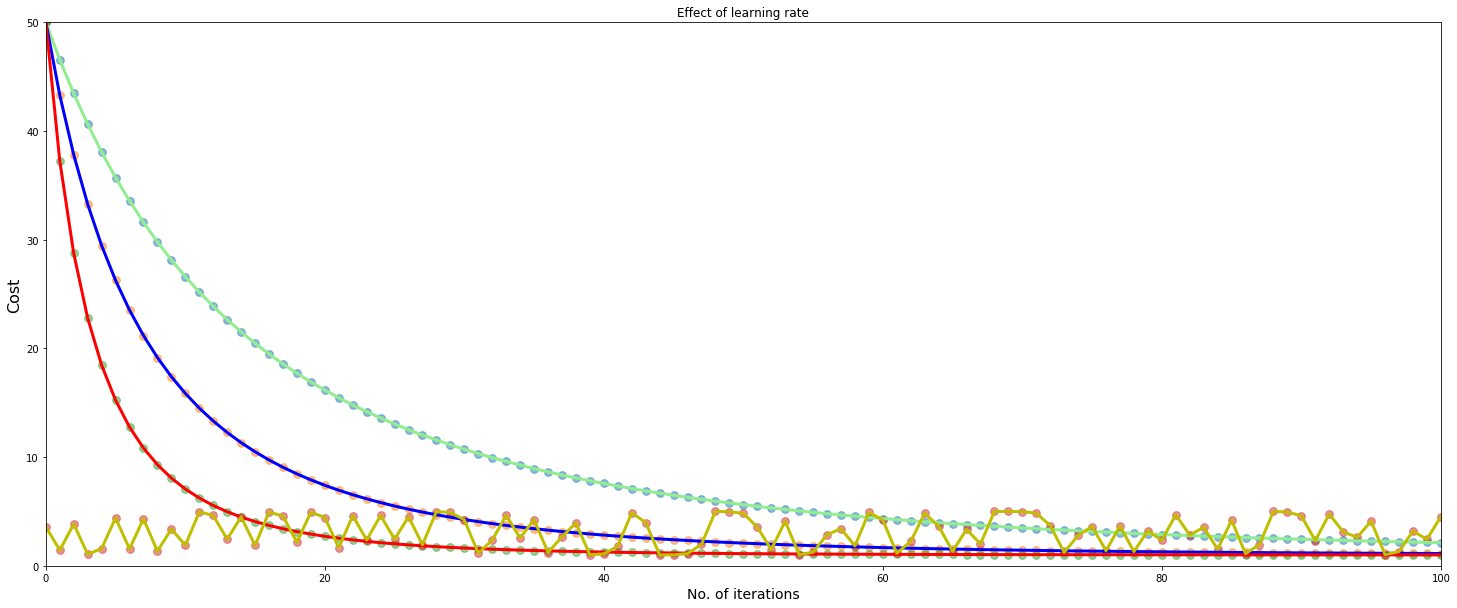

In [167]:
#Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(dg,init_guess= 3,learning_rate= 0.0005,precision= 0.0001,max_iter=n)

mid_gamma = gradient_descent(dg,init_guess= 3,learning_rate= 0.001,precision= 0.0001,max_iter=n)
high_gamma = gradient_descent(dg,init_guess= 3,learning_rate= 0.002,precision= 0.0001,max_iter=n)

#Experiment
insane_gamma = gradient_descent(dg,init_guess= 1.9,learning_rate= 0.25,precision= 0.0001,max_iter=n)

#plotting reduction in cost for each iteration
plt.figure(figsize=(25,10))

plt.xlim(0,n)
plt.ylim(0,50)

plt.xlabel('No. of iterations',fontsize=14)
plt.ylabel('Cost',fontsize=16)
plt.title('Effect of learning rate')

#values for our chart
# 1) y axis Data : convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X axis Data: create list from 0 to n+1
iteration_list = list(range(0,n+1))

#plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen',linewidth=3)
plt.scatter(iteration_list, g(low_values),s=60,alpha=0.5)

#plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='b',linewidth=3)
plt.scatter(iteration_list, g(mid_values),s=60,alpha=0.5)

#plotting high learning rate
plt.plot(iteration_list, g(high_values), color='r',linewidth=3)
plt.scatter(iteration_list, g(high_values),s=60,alpha=0.5)

#plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='y',linewidth=3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])),s=60,alpha=0.5)

plt.show()



# Example 4 - Data Viz with 3D Charts

## Minimize $$f(x, y) = \frac{1}{3^{-x^2 - y^2}+1}$$

Minimize $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [168]:
def f(x, y):
    r = 3 ** (-x**2 - y**2)
    return 1 / (r + 1)

In [169]:
#Make Data for x and y
x_4 = np.linspace(-2,2,num=200)
y_4 = np.linspace(-2,2,num=200)

print('shape of x:', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid',x_4.shape)


shape of x: (200,)
Array after meshgrid (200, 200)


In [170]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

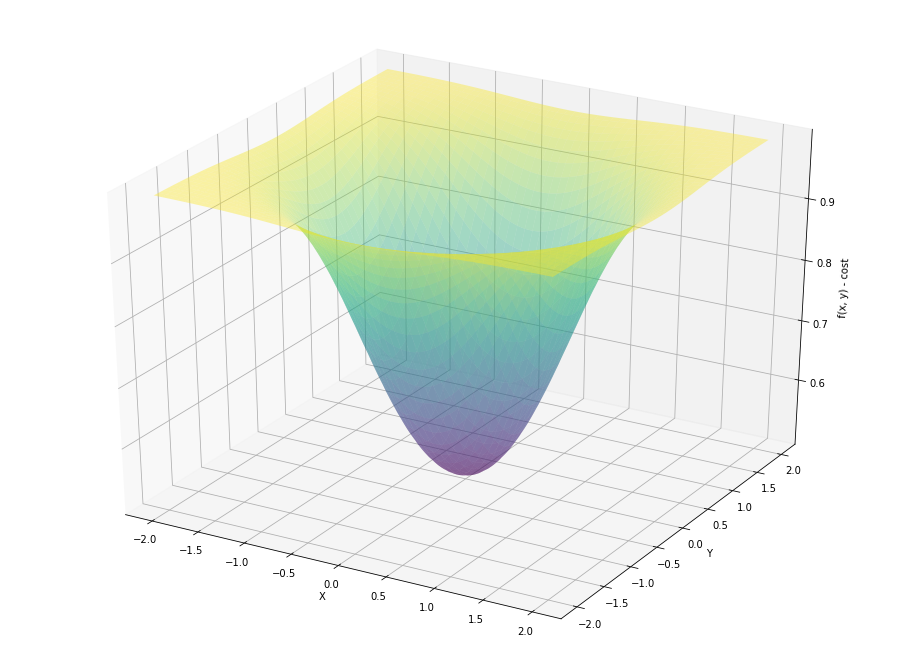

In [171]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')     #gca = get current axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y) - cost')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap='viridis', alpha=0.4)
plt.show()

## Partial Derivatives and Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3)\cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2 }+1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3)\cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2 }+1 \right)^2}$$

In [172]:
from sympy import symbols, diff 

In [173]:
a, b = symbols('x, y')
print('Our Cost Function is:',f(a, b))
print('Partial Derivative w.r.t x is:',diff(f(a, b), a))

print('Value of f(x,y) at x=1.8 y=1.2 is:',f(a, b).evalf(subs={a:1.8, b:1.2})) 
print('Value of partial derivative w.r.t x is:',diff(f(a, b), a).evalf(subs={a:1.8, b:1.2}))

Our Cost Function is: 1/(3**(-x**2 - y**2) + 1)
Partial Derivative w.r.t x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.2 is: 0.994185132913143
Value of partial derivative w.r.t x is: 0.0228640946892085


 ## Batch Gradient Descent with SymPy

In [174]:
#setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradients
    
print('Values in gradient array: ', gradients)
print('Min occurs at x value of: ', params[0])
print('Min occurs at y value of : ', params[1])
print('Cost is: ',f(params[0],params[1]))

Values in gradient array:  [2.01013037525579e-11 1.11673909736433e-11]
Min occurs at x value of:  3.45838599885832e-11
Min occurs at y value of :  1.92132555492129e-11
Cost is:  0.500000000000000


In [175]:
from math import log

In [176]:
#Partial derivative functions example 4
def fpx(x, y):
    s = 3**(-x**2 - y**2)
    return 2*x*log(3)*s/(s+1)**2

In [177]:
def fpy(x, y):
    s = 3**(-x**2 - y**2)
    return 2*y*log(3)*s/(s+1)**2

In [178]:
fpx(1.8, 1.0)

0.036808971619750504

In [179]:
#setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradients
    
print('Values in gradient array: ', gradients)
print('Min occurs at x value of: ', params[0])
print('Min occurs at y value of : ', params[1])
print('Cost is: ',f(params[0],params[1]))

Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Min occurs at x value of:  3.458385998858304e-11
Min occurs at y value of :  1.9213255549212797e-11
Cost is:  0.5


##  Graphing 3D Gradient Descent 

In [180]:
#setup
learning_rate = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1,2)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - learning_rate * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
    
print('Values in gradient array: ', gradients)
print('Min occurs at x value of: ', params[0])
print('Min occurs at y value of : ', params[1])
print('Cost is: ',f(params[0],params[1]))

Values in gradient array:  [2.01013038e-11 1.11673910e-11]
Min occurs at x value of:  3.458385998858304e-11
Min occurs at y value of :  1.9213255549212797e-11
Cost is:  0.5


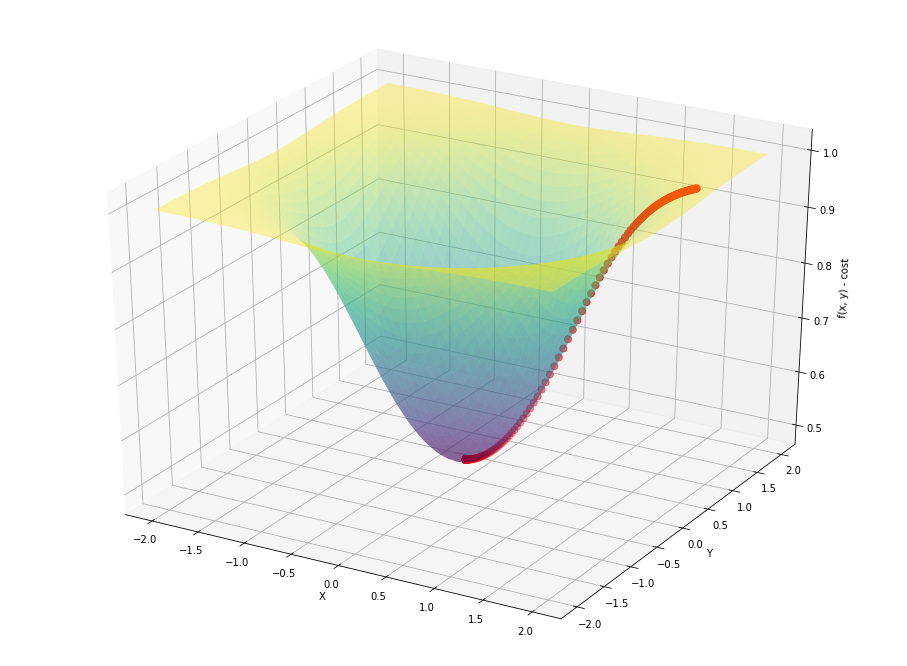

In [181]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')     #gca = get current axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y) - cost')

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap='viridis', alpha=0.4)
ax.scatter(values_array[:,0], values_array[:,1],
           f(values_array[:,0], values_array[:,1]), s=50, color = 'red')
plt.show()

# Example 5 - Working with Data and Real Cost Function
## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^n \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$
### $$MSE = \frac {1}{n}\sum_{i=1}^n \big( y^{(i)} - h_\theta x^{(i)}  \big)^2 $$
### $$MSE = \frac {1}{n}\sum_{i=1}^n \big( y - \hat{y} \big)^2 $$

In [182]:
#Make sample data
x_5 = np.array([[1.1, 1.2, 2.4, 3.4, 4.1, 5.6, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.4, 6.1, 3.0, 9.3, 8.3]).reshape(7,1)

print('Shape of x_5: ', x_5.shape)
print('Shape of y_5: ', y_5.shape)

Shape of x_5:  (7, 1)
Shape of y_5:  (7, 1)


In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
reg = LinearRegression()

In [185]:
reg.fit(x_5, y_5)
print('Theta 0: ',reg.intercept_[0])
print('Theta 1: ',reg.coef_[0][0])

Theta 0:  0.4511852502194893
Theta 1:  1.2774363476733983


In [186]:
pred = reg.predict(x_5)

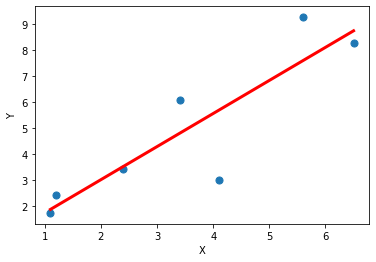

In [187]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, pred, color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [188]:
#y_hat = theta0 + theta1*x
y_hat = reg.intercept_[0] + reg.coef_[0][0]*x_5
print('Estimated values y_hat are: \n', y_hat)
print('In comparision, the actual y values are: \n', y_5)

Estimated values y_hat are: 
 [[1.85636523]
 [1.98410887]
 [3.51703248]
 [4.79446883]
 [5.68867428]
 [7.6048288 ]
 [8.75452151]]
In comparision, the actual y values are: 
 [[1.7]
 [2.4]
 [3.4]
 [6.1]
 [3. ]
 [9.3]
 [8.3]]


In [189]:
def mse(y, y_hat):
    mse_calc = 1/y.size * sum((y - y_hat)**2) 
    return mse_calc

In [190]:
mse(y_5, y_hat)

array([1.74638405])

In [191]:
from sklearn.metrics import mean_squared_error

In [192]:
mean_squared_error(y_5, y_hat)

1.7463840461557762

In [193]:
mean_squared_error(y_5, pred)

1.7463840461557762

## 3D plot fot MSE cost function
### Make data for thetas

In [194]:
no_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=no_thetas)
th_1 = np.linspace(start=-1, stop=3, num=no_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

## Calc MSE using nested for loops

In [195]:
plot_cost = np.zeros((no_thetas, no_thetas))
for i in range(no_thetas):
    for j in range(no_thetas):
       # print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0', plot_t0.shape)       
print('Shape of plot_t1', plot_t1.shape)        
print('Shape of plot_cost', plot_cost.shape)        

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


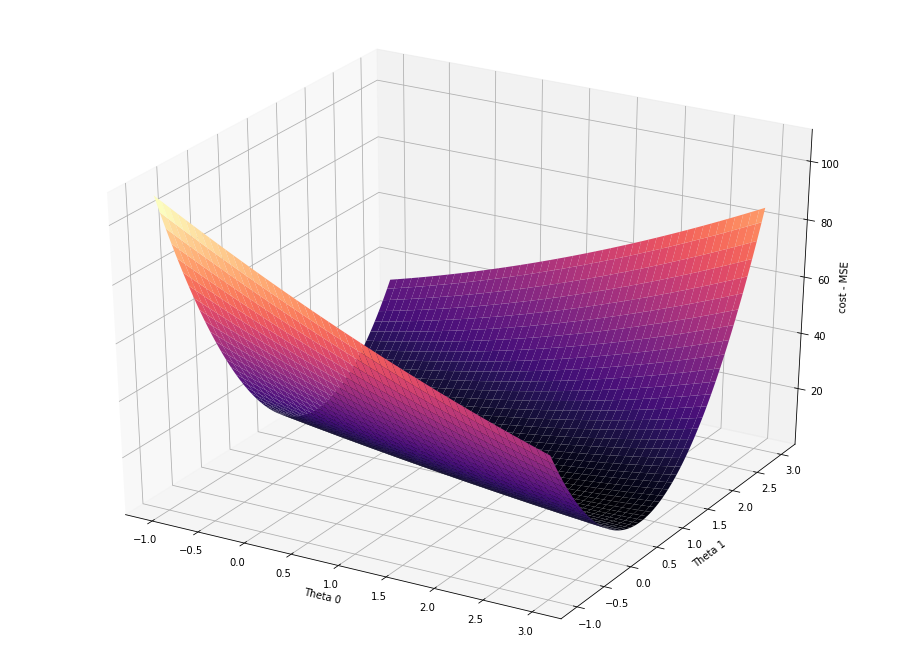

In [196]:
#plotting MSE
fig = plt.figure(figsize=([16,12]))
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('cost - MSE')

ax.plot_surface(plot_t0, plot_t1, plot_cost,cmap='magma')
plt.show()

In [197]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j): ', ij_min)
print('Min MSE for theta 0 at plot_t0[113][73]:', plot_t0[113][73])

print('Min MSE for theta 1 at plot_t1[113][73]:', plot_t1[113][73])

Min value of plot_cost 1.7465460468169998
Min occurs at (i,j):  (113, 73)
Min MSE for theta 0 at plot_t0[113][73]: 0.46733668341708534
Min MSE for theta 1 at plot_t1[113][73]: 1.271356783919598


## Partial Derivatives of MSE w.r.t $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$

## $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $$

## MSE & Gradient Descent

In [201]:
#x values, y values, array of theta parameter
def grad(x,y, thetas):
    n = y.size
    
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)* x)
    
#     return np.array([theta0_slope[0],[theta1_slope[0]]])
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [203]:
learning_rate = 0.01
thetas = np.array([2.9, 2.9])

#collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(500):
    thetas = thetas - learning_rate * grad(x_5, y_5, thetas)
    #append new value to our numpy array
    plot_vals = np.concatenate((plot_vals,thetas.reshape(1,2)), axis=0)
    mse_vals = np.concatenate((mse_vals, mse(y_5, thetas[0]+thetas[1]*x_5)))
    
#Results
print('Min occurs at Theta 0: ', thetas[0])
print('Min occurs at Theta 1: ', thetas[1])
print('MSE :', mse(y_5, thetas[0] + thetas[1]* x_5))

Min occurs at Theta 0:  0.6600335606563054
Min occurs at Theta 1:  1.2307980615581198
MSE : [1.75667776]


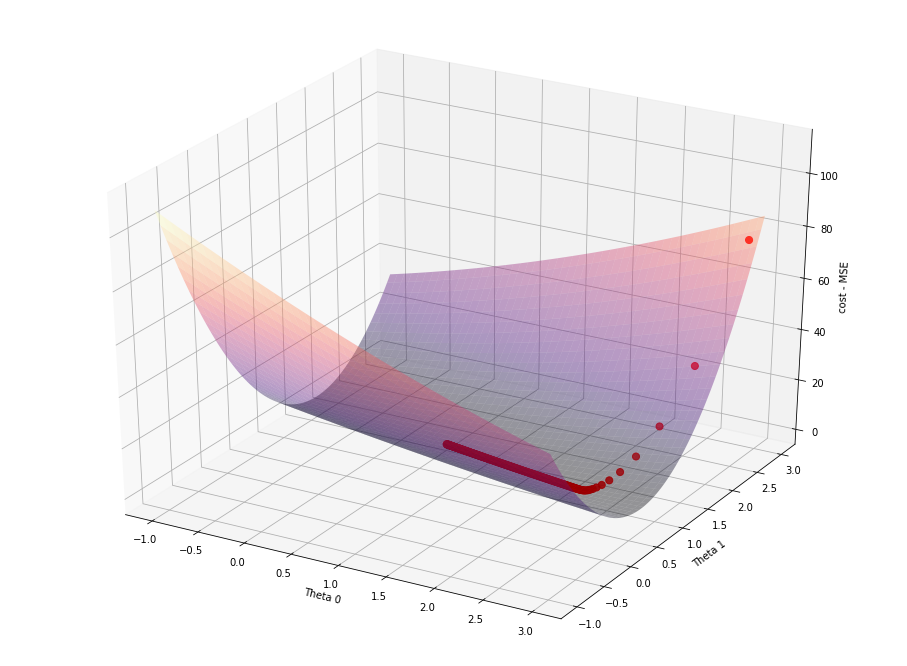

In [209]:
#plotting MSE
fig = plt.figure(figsize=([16,12]))
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('cost - MSE')

ax.scatter(plot_vals[:,0],plot_vals[:,1], mse_vals,color='red',s=50)
ax.plot_surface(plot_t0, plot_t1, plot_cost,cmap='magma',alpha=0.4)
plt.show()